In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
import tensorflow as tf
from tensorflow import constant
tf.__version__

'2.1.0'

In [12]:
# datasets used
credit = pd.read_csv('./credit.csv')
gray_tensor = pd.read_csv('./gray_tensor.csv').to_numpy()
color_tensor = pd.read_csv('./color_tensor.csv').to_numpy().reshape(28, 28, 3)

# Constants and variables

## Defining data as constants

In [5]:
print(credit.shape)
credit.head()

(30000, 4)


,0,1,2,3
0,2.0,1.0,24.0,3913.0
1,2.0,2.0,26.0,2682.0
2,2.0,2.0,34.0,29239.0
3,2.0,1.0,37.0,46990.0
4,2.0,1.0,57.0,8617.0


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       30000 non-null  float64
 1   1       30000 non-null  float64
 2   2       30000 non-null  float64
 3   3       30000 non-null  float64
dtypes: float64(4)
memory usage: 937.6 KB


In [7]:
credit_numpy = credit.to_numpy()

In [8]:
# convert credit_numpy array into a tensorflow constant
credit_constant = constant(credit_numpy)
# print dtype
print(f'The datatype is: {credit_constant.dtype}')
print(type(credit_constant))

The datatype is: <dtype: 'float64'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


## Defining variables

In [9]:
# define the 1d variable A1
A1 = tf.Variable([1, 2, 3, 4])
print(A1)

# convert A1 to a numpy array
B1 = A1.numpy()
print(B1)

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4])>
[1 2 3 4]


# Basic Operations

## Performing element-wise multiplication

In [10]:
# define tensors A1 and A23 as constants
A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [1, 6, 4]])

# define B1 and B23 to have the correct shape
B1 = tf.ones_like(A1)
B23 = tf.ones_like(A23)

# perform element wise multiplication
C1 = tf.multiply(A1, B1)
C23 = tf.multiply(A23, B23)

print(f'C1: {C1.numpy()}\nC23:{C23.numpy()}')

C1: [1 2 3 4]
C23:[[1 2 3]
 [1 6 4]]


## Making predictions with matrix multiplication

In [11]:
# define features, params, and bill as constants
features = constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = constant([[1000], [150]])
bill = constant([[3913], [2682], [8617], [64400]])

# compute billpred using features and params
billpred = tf.matmul(features, params)

# compute error
error = bill - billpred
print(error.numpy())

[[-1687]
 [-3218]
 [-1933]
 [57850]]


# Advanced operations

## Reshaping tensors

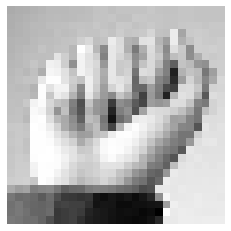

In [16]:
plt.imshow(gray_tensor, cmap='gray')
plt.grid(False)
plt.axis('off')
plt.show()

In [17]:
# reshape the grayscale image tensor into a vector
gray_vector = tf.reshape(gray_tensor, (28*28, 1))
# and for the color tensor
color_vector = tf.reshape(color_tensor, (28*28*3, 1))

## Optimizing gradients

In [18]:
# minimize a quadratic fxn using the GradientTape operation
def compute_gradient(x0):
    # define x as a variable with an initial value of x0
    x = tf.Variable(x0)
    with tf.GradientTape() as tape:
        tape.watch(x)
        # define y using the multiply fxn
        y = tf.multiply(x, x)
        # return the gradient of y wrt x
        return tape.gradient(y, x).numpy()

In [19]:
# compute and print gradients at x=-1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


## Working with image data

In [21]:
letter = np.array([[1, 0, 1],
                   [1, 1, 0],
                   [1, 0, 1]], dtype=np.float32)
model = np.array([[1, 0, -1]], dtype=np.float32)

In [24]:
# given a toy model that predicts whether an input is K (1) or X (0)

# reshape model from 1x3 to 3x1 tensor
model = tf.reshape(model, (3, 1))

output = tf.matmul(letter, model)

pred = tf.reduce_sum(output)
print(pred.numpy())

1.0
